# Procesando archivos y bases de datos con Python 

Material original en inglés: Python Data Science Handbook (https://github.com/jakevdp/PythonDataScienceHandbook)

Traducido/Adaptado por [G.F. Rubilar] y [S. Niklitschek].

## Este módulo entregará las herramientas para:

1. Lectura y escritura de archivos con funciones propias de python
2. Lectura y escritura de archivos con funciones de numpy: loadtxt, getfromtxt etc
3. Introducción al uso de base de datos con Pandas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1. Procesamiento de archivos con la función open y close de python

Vamos a trabajar con el archivo *posicion_velocidad.dat* que contiene la velocidad en km/h de un auto medida en distintos puntos de su  trayectoria expresada en km. Este archivo se encuentra en el repositorio en el directorio _Data/Clases_

```
0.0  30
0.8  50
1.5  43.2
2.0  20.0
2.6  42.1
```

Primero abrimos un objeto con la ubicación (ruta) en donde se encuentra el archivo.

In [4]:
str_archivo = 'Data/Clases/posicion_velocidad.dat'
f = open(str_archivo)

Obtener información sobre el objeto que apunta al archivo

In [5]:
f.name

'Data/Clases/posicion_velocidad.dat'

In [6]:
f.mode

'r'

Por defecto los archivos se abren en modo de lectura solamente(read). Otros modos son w (write=escritura), a (append=agregar)

### Usamos el método _read_ del objeto f para leer el contenido.

In [7]:
data = f.read()

In [8]:
data

'0.0  30\n0.8  50\n1.5  43.2\n2.0  20.0\n2.6  42.1\n'

Si queremos volver a leer el contenido

In [9]:
data = f.read()

In [10]:
data

''

**Problema:** El archivo se procesa una vez y después se llego al final del archivo.
Cerramos el objeto y volvemos a abrirlo para partir de nuevo.

In [11]:
f.close()

In [12]:
f = open(str_archivo)

### Ahora usamos método readline para leer el archivo

In [13]:
f.readline?

In [14]:
line = f.readline()

In [15]:
line

'0.0  30\n'

In [16]:
line.split()

['0.0', '30']

In [17]:
x = line.split()[0]
x

'0.0'

In [18]:
line.split()[0], line.split()[1]

('0.0', '30')

Volvemos a ejecutar readline para leer próxima linea.

In [19]:
line = f.readline()

In [20]:
line

'0.8  50\n'

In [21]:
f.close()

**También podemos leer todas las líneas de una vez en una lista de strings con la función _readlines_**

A diferencia de _read_ esto crea una lista de strings y no un string entero.

In [22]:
f = open(str_archivo)

In [23]:
lines = f.readlines()

In [24]:
lines

['0.0  30\n', '0.8  50\n', '1.5  43.2\n', '2.0  20.0\n', '2.6  42.1\n']

In [25]:
lines[0]

'0.0  30\n'

In [26]:
lines[0].split()

['0.0', '30']

In [27]:
f.close()

**Ahora vamos a leer el contenido en dos variables que muestran la posición (x) y la velocidad (v).**

In [231]:
f = open(str_archivo)

Cuando usamos un bucle sobre el objeto f se ejecuta la función _readline_ en cada vuelta del bucle.

In [232]:
for line in f:
    x = line.split()[0]
    v = line.split()[1]

In [233]:
x

'2.6'

De esta forma se leen linea por linea.
**Pero la variable se sobreescribe.**
Por eso debemos trabajar con una lista

In [29]:
f.close()
f = open(str_archivo)

In [30]:
x = []
v = []

In [31]:
for line in f:
    x.append(line.split()[0])
    v.append(line.split()[1])

In [32]:
x

['0.0', '0.8', '1.5', '2.0', '2.6']

In [33]:
type(x[0])

str

In [34]:
v

['30', '50', '43.2', '20.0', '42.1']

In [35]:
type(v[0])

str

** Realizamos un gráfico de la velocidad contra la posición de la trayectoria en el cual se midio**

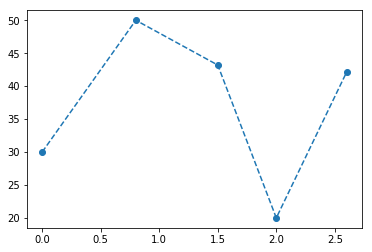

In [36]:
plt.plot(x,v,'o--')

** Supongamos que se nos solicita graficar velocidad pero en función de la posición en metros.**

In [37]:
x_m = []
for i in range(len(x)):
    x_m.append(x[i]*1000)

In [38]:
x_m

['0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.

Debemos transformar la información leida al tipo de variable **float** para poder utilizar cualquier tratamiento númerico de los datos.

In [39]:
f.close()
f = open(str_archivo)
x = []
v = []
for line in f:
    x.append(float(line.split()[0]))
    v.append(float(line.split()[1]))

In [40]:
type(x[0])

float

In [41]:
x_m = []
for i in range(len(x)):
    x_m.append(x[i]*1000)

In [42]:
x_m

[0.0, 800.0, 1500.0, 2000.0, 2600.0]

Ahora cambiamos las velocidades a m/s

In [43]:
v_ms = []
for i in range(len(v)):
    v_ms.append(v[i] * 1000 / 3600)

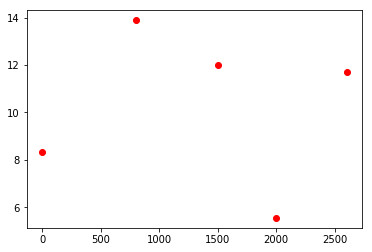

In [44]:
plt.plot(x_m,v_ms,'o',color='red')

### Cómo guardar los valores en metros y metros por segundo a un archivo diferente.

In [252]:
str_archivo_out = 'Data/Clases/posicion_velocidad_metros.dat'
f_out = open(str_archivo_out,'w')

In [47]:
f_out.write(str(x_m))

36

In [48]:
f_out.close()

Al observar el archivo vemos que se escribe todo junto.

Cómo escribimos cada item por separado?

In [49]:
f_out = open(str_archivo_out,'w')

In [50]:
for i in range(len(x_m)):
    f_out.write(str(x_m[i]))

In [51]:
f_out.close()

Como escribir en forma de columna?

In [52]:
f_out = open(str_archivo_out,'w')

In [53]:
for i in range(len(x_m)):
    f_out.write(str(x_m[i])+'\n')

In [54]:
f_out.close()

Ahora escribimos la posición junto a la velocidad en el archivo

In [55]:
f_out = open(str_archivo_out,'w')

In [56]:
for i in range(len(x_m)):
    f_out.write(str(x_m[i]) + '\t' + str(v_ms[i]) + '\n')

In [61]:
f_out.close()

Mejoremos el formato de los datos escritos.

Para mayor información ver  https://docs.python.org/3/library/string.html#formatstrings y https://docs.python.org/3/tutorial/inputoutput.html

In [91]:
f_out = open(str_archivo_out,'w')

In [93]:
for i in range(len(x_m)):
    f_out.write("{0:.2f}\t{1:.2f}\n".format(x_m[i], v_ms[i]))

In [94]:
f_out.close()

**En python 2.7:**

for i in range(len(x_m)):

    f_out.write("%.2f\t%.2f\n" % (x_m[i], v_ms[i]))

Format Strings for python 2.7

%d : integer

%5d : %-5d : integer in a field of width 5 chars integer in a field of width 5 chars, but adjusted to the left

%05d :integer in a field of width 5 chars, padded with zeroes from the left

%g :  float variable in %f or %g notation

%e : float variable in scientific notation

%11.3e : float variable in scientific notation, with 3 decimals, field of width 11 chars 

%5.1f : float variable in fixed decimal notation, with one decimal, field of width 5 chars 

%.3f : float variable in fixed decimal form, with three decimals, field of min. width
%s : string

**Format strings en python 3.6 **

In [95]:
str.format?

In [96]:
f_out = open(str_archivo_out,'w')

La versión mas moderna es usar la función format de un string para dar formato a los datos.

In [64]:
for i in range(len(x_m)):
    f_out.write('{0:.2f}   {1:.2f}\n'.format(x_m[i],v_ms[i]))

In [65]:
f.close()

Alineamos los datos

In [112]:
f_out.close()
f_out = open(str_archivo_out,'w')

In [113]:
for i in range(len(x_m)):
    f_out.write('{0:<8.2f}   {1:<4.2f}\n'.format(x_m[i],v_ms[i]))

In [114]:
f_out.close()

## Agregar datos a un archivo existente

In [115]:
f_out = open(str_archivo_out,'a')

In [116]:
f_out.mode

'a'

Go to end of file

In [117]:
f_out.write('END\n')

4

In [118]:
f_out.close()

_Abra el archivo para verificar si se añado END al final_

# 2. Procesar archivos con las funciones de numpy 

Cuando el archivo contiene comentarios que identifican con un caracter específico como **# @** se pueden usar las funciones _loadtxt_ o _genfromtxt_ de numpy para poder procesarlo. Si el contenido es muy heterogeneo se puede procesar el archivo a través de tratamientos de distintos casos con _if_

In [255]:
str_archivo = 'Data/Clases/posicion_velocidad_coment.dat'
f = open(str_archivo)

In [256]:
x = []
v = []
for line in f:
    x.append(float(line.split()[0]))
    v.append(float(line.split()[1]))        

ValueError: could not convert string to float: '#posicion'

In [257]:
f.close()
f = open(str_archivo)

In [258]:
x = []
v = []
for line in f:
    if line[0] is not "#":
        x.append(float(line.split()[0]))
        v.append(float(line.split()[1]))        
        

In [259]:
x

[0.0, 0.8, 1.5, 2.0, 2.6]

In [260]:
f.close()

** Esto ahora se puede funcionalizar para el formato específico que tengan sus datos.**

## Ahora usaremos la funciones de numpy para procesar archivos.

Trabajaremos con el archivo posicion_velocidad_coment.dat que se muestra aquí:


```#posicion velocidad
0.0  30
0.8  50
1.5  43.2
2.0  20.0
2.6  42.1```

In [261]:
str_archivo = 'Data/Clases/posicion_velocidad_coment.dat'

### Función _loadtxt_

Usamos la función loadtxt de numpy que nos permite procesar archivos con datos númericos

In [262]:
np.loadtxt?

Existen las opciones de definir el tipo de información a procesar como float, string, double etc, el delimitador de los valores y el saltar los primeras n lineas con skiprows.

In [263]:
np.loadtxt(str_archivo)

array([[  0. ,  30. ],
       [  0.8,  50. ],
       [  1.5,  43.2],
       [  2. ,  20. ],
       [  2.6,  42.1]])

In [264]:
data = np.loadtxt(str_archivo)

In [265]:
data[:,0]

array([ 0. ,  0.8,  1.5,  2. ,  2.6])

In [266]:
data[:,1]

array([ 30. ,  50. ,  43.2,  20. ,  42.1])

In [267]:
x = data[:,0]

In [268]:
v = data[:,1]

In [269]:
x, v

(array([ 0. ,  0.8,  1.5,  2. ,  2.6]),
 array([ 30. ,  50. ,  43.2,  20. ,  42.1]))

Ahora importamos directamente en las dos variables con opción "unpack"

In [270]:
x,v  = np.loadtxt(str_archivo,unpack=True)

In [271]:
x

array([ 0. ,  0.8,  1.5,  2. ,  2.6])

### Función genfromtxt

Usamos la alternativa de genfromtxt para trabajar con archivos que presenten datos incompletos o para tener mayor flexibilidad en el procesamiento.


In [272]:
np.genfromtxt?

El archivo posicion_velocidad_missing.dat le falta un valor en la velocidad:

```@ Archivo obtenido el 30 diciembre 2016
0.0  30
0.8  50
1.5  43.2
2.0  Bla 
2.6  42.1```

**Probamos con la función _loadtxt_**

In [273]:
str_archivo = 'Data/Clases/posicion_velocidad_missing.dat'
data = np.loadtxt(str_archivo,comments='@')

ValueError: could not convert string to float: b'Bla'

_ No podemos usar esta función si los datos son incompletos_

** Ahora con genfromtxt **

In [277]:
str_archivo = 'Data/Clases/posicion_velocidad_missing.dat'
data = np.genfromtxt(str_archivo,comments='@')

In [278]:
data

array([[  0. ,  30. ],
       [  0.8,  50. ],
       [  1.5,  43.2],
       [  2. ,   nan],
       [  2.6,  42.1]])

Como cambiamos el valor del item ausente?

In [279]:
np.genfromtxt?

In [280]:
data = np.genfromtxt(str_archivo,comments='@',filling_values='0.0')

In [281]:
data

array([[  0. ,  30. ],
       [  0.8,  50. ],
       [  1.5,  43.2],
       [  2. ,   0. ],
       [  2.6,  42.1]])

** Leer el nombre de la variable que representará los datos desde el archivo** 

Como ejemplo se usará el archivo posicion_velocidad_names.dat:

```@ Archivo obtenido el 30 diciembre 2016
x    v
0.0  30
0.8  50
1.5  43.2
2.0  Bla 
2.6  42.1```

In [282]:
str_archivo = 'Data/Clases/posicion_velocidad_names.dat'
data1 = np.genfromtxt(str_archivo,skip_header=1,names=True,filling_values='0.0')

_No se puede usar la opción de "comments" y "names" juntos_

In [284]:
str_archivo = 'Data/Clases/posicion_velocidad_names.dat'
data1 = np.genfromtxt(str_archivo,comments='@',names=True,filling_values='0.0')

ValueError: Some errors were detected !
    Line #2 (got 2 columns instead of 6)
    Line #3 (got 2 columns instead of 6)
    Line #4 (got 2 columns instead of 6)
    Line #5 (got 2 columns instead of 6)
    Line #6 (got 2 columns instead of 6)
    Line #7 (got 2 columns instead of 6)

In [285]:
data1

array([( 0. ,  30. ), ( 0.8,  50. ), ( 1.5,  43.2), ( 2. ,   0. ),
       ( 2.6,  42.1)], 
      dtype=[('x', '<f8'), ('v', '<f8')])

In [286]:
type(data1)

numpy.ndarray

In [287]:
data1['v']

array([ 30. ,  50. ,  43.2,   0. ,  42.1])

In [288]:
data1['x']

array([ 0. ,  0.8,  1.5,  2. ,  2.6])

In [289]:
np.genfromtxt?

In [290]:
np.savetxt?

## Después de hacer un análisis numérico con numpy como guardar array de datos en archivo

### Usando las opciones "tofile" y "fromfile" en numpy

In [291]:
x = np.array([[0, 1, 2 ],[2, 3, 4]])

In [310]:
f = open('Data/Clases/array.bin','w')
x.tofile(f,format="%d")

In [311]:
x.tofile?

In [312]:
x


array([[0, 1, 2],
       [2, 3, 4]])

In [313]:
f.close()

In [314]:
y = np.fromfile('Data/Clases/array.bin')

In [315]:
y

array([  0.00000000e+000,   4.94065646e-324,   9.88131292e-324,
         9.88131292e-324,   1.48219694e-323,   1.97626258e-323])

**Los datos se guardan en forma binaria sin información alguna sobre el tipo de variable. Aparte la forma de guardar los datos depende del sistema operativo que se usa. Por eso se recomienda usar la opción save y load de numpy.**

In [316]:
x

array([[0, 1, 2],
       [2, 3, 4]])

_Preferible es usar la opción np.save del módulo numpy_

In [318]:
np.save?

In [319]:
f = 'Data/Clases/array.npy'
np.save(f,x)

In [320]:
y = np.load(f)

In [321]:
y

array([[0, 1, 2],
       [2, 3, 4]])

*También se puede guardar en forma de texto sacrificando precisión y espacio de disco. Se puede especificar el formato de la variable a guardar*

In [327]:
np.savetxt?

In [328]:
np.savetxt('Data/Clases/array.dat',x,fmt="%d")

In [329]:
np.loadtxt?

In [330]:
y = np.loadtxt('Data/Clases/array.dat')

_Comparamos los tipos de arreglos entre el original (x) y el obtenido desde el archivo (y)_

In [331]:
type(y[0][1])

numpy.float64

In [307]:
type(x[0][1])

numpy.int64

In [308]:
y = np.loadtxt('Data/Clases/array.dat',dtype=int)

In [175]:
type(y[0][1])

numpy.int64

# Modulo Pandas


## Cuando se tiene una bases de datos que tiene distintos tipos de datos con formato diferente se recomienda usar el módulo pandas

Para mayor información visite: http://pandas.pydata.org

![Pandas](images/pandas.png "Panadas")

In [4]:
import pandas as pd

Ahora procesaremos una base de datos bajada en internet bajo el link https://catalog.data.gov/dataset/most-popular-baby-names-by-sex-and-mothers-ethnic-group-new-york-city-8c742 que contiene información sobre los nombres de bebes según género y grupo etnico al cual pertenece la madre.

Las primeras lineas se ven aquí:
```

Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank

2011,FEMALE,HISPANIC,GERALDINE,13,75

2011,FEMALE,HISPANIC,GIA,21,67

2011,FEMALE,HISPANIC,GIANNA,49,42

2011,FEMALE,HISPANIC,GISELLE,38,51

2011,FEMALE,HISPANIC,GRACE,36,53```


La primera línea muestra el nombre de la variable de cada columna y las siguientes lineas contienen los datos.

Para eso usamos pandas que es un modulo de python que facilita el tratamiento de datos heterogéneos (strings, float etc.)


Mayor información se puede obtener en estos dos tutoriales de introducción:

http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb

http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/02%20-%20Lesson.ipynb

In [1]:
str_archivo = 'Data/Clases/Most_Popular_Baby_Names_by_Sex_and_Mother_s_Ethnic_Group__New_York_City.csv'

In [2]:
pd.read_csv?

Object `pd.read_csv` not found.


In [5]:
data = pd.read_csv(str_archivo)

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
5,2011,FEMALE,HISPANIC,GUADALUPE,26,62
6,2011,FEMALE,HISPANIC,HAILEY,126,8
7,2011,FEMALE,HISPANIC,HALEY,14,74
8,2011,FEMALE,HISPANIC,HANNAH,17,71
9,2011,FEMALE,HISPANIC,HAYLEE,17,71


In [184]:
data['Year of Birth']

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
         ... 
22005    2014
22006    2014
22007    2014
22008    2014
22009    2014
22010    2014
22011    2014
22012    2014
22013    2014
22014    2014
22015    2014
22016    2014
22017    2014
22018    2014
22019    2014
22020    2014
22021    2014
22022    2014
22023    2014
22024    2014
22025    2014
22026    2014
22027    2014
22028    2014
22029    2014
22030    2014
22031    2014
22032    2014
22033    2014
22034    2014
Name: Year of Birth, Length: 22035, dtype: int64

In [337]:
data['Child\'s First Name']

0         GERALDINE
1               GIA
2            GIANNA
3           GISELLE
4             GRACE
5         GUADALUPE
6            HAILEY
7             HALEY
8            HANNAH
9            HAYLEE
10           HAYLEY
11            HAZEL
12           HEAVEN
13            HEIDI
14            HEIDY
15            HELEN
16            IMANI
17           INGRID
18            IRENE
19             IRIS
20           ISABEL
21          ISABELA
22         ISABELLA
23         ISABELLE
24             ISIS
25            ITZEL
26         IZABELLA
27       JACQUELINE
28             JADA
29             JADE
            ...    
22005        Victor
22006       Vincent
22007      Vincenzo
22008        Wesley
22009        Weston
22010       William
22011       Winston
22012          Wolf
22013         Wyatt
22014        Xavier
22015        Yaakov
22016         Yahya
22017         Yakov
22018        Yaseen
22019       Yechiel
22020      Yehoshua
22021        Yehuda
22022         Yidel
22023       Yisrael


**Pandas ofrece una serie de análisis estadísticos sobre cada serie**

Podemos sumar el número total de nombres (niños) de toda la base de datos

In [338]:
data['Count']

0         13
1         21
2         49
3         38
4         36
5         26
6        126
7         14
8         17
9         17
10        13
11        10
12        15
13        15
14        16
15        13
16        11
17        11
18        11
19        10
20        28
21        10
22       331
23        18
24        13
25        27
26        23
27        30
28        21
29        50
        ... 
22005     35
22006     43
22007     11
22008     11
22009     11
22010    183
22011     11
22012     12
22013     33
22014     25
22015     46
22016     11
22017     45
22018     12
22019     39
22020     26
22021     86
22022     10
22023     14
22024     83
22025     15
22026     66
22027     12
22028    116
22029     15
22030     18
22031     24
22032     16
22033     90
22034     49
Name: Count, Length: 22035, dtype: int64

In [339]:
data['Count'].sum()

760490

** Ahora lo vamos a ordenar según el número de niños con ese nombre.**

In [351]:
data.sort_values('Count')

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
2767,2011,FEMALE,HISPANIC,ABBY,10,78
11025,2013,MALE,ASIAN AND PACIFIC ISLANDER,Nolan,10,57
17344,2012,FEMALE,WHITE NON HISP,MARYAM,10,83
17347,2012,FEMALE,WHITE NON HISP,MELANIE,10,83
11013,2013,MALE,ASIAN AND PACIFIC ISLANDER,Maximilian,10,57
11009,2013,MALE,ASIAN AND PACIFIC ISLANDER,Martin,10,57
3730,2011,MALE,WHITE NON HISPANIC,DEREK,10,97
10947,2013,MALE,ASIAN AND PACIFIC ISLANDER,Eden,10,57
17390,2012,FEMALE,WHITE NON HISP,REEM,10,83
10943,2013,MALE,ASIAN AND PACIFIC ISLANDER,Devin,10,57


In [352]:
data.sort_values('Count',ascending=False)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
3505,2011,MALE,HISPANIC,JAYDEN,426,1
5430,2011,MALE,HISPANIC,JAYDEN,426,1
1504,2011,MALE,HISPANIC,JAYDEN,426,1
7393,2011,MALE,HISPANIC,JAYDEN,426,1
15965,2011,MALE,HISPANIC,JAYDEN,426,1
9385,2012,MALE,HISPANIC,JAYDEN,364,1
17912,2012,MALE,HISPANIC,JAYDEN,364,1
19915,2013,MALE,HISPANIC,Jayden,352,1
11402,2013,MALE,HISPANIC,Jayden,352,1
22,2011,FEMALE,HISPANIC,ISABELLA,331,1


** Ahora ordenamos según el año, genero y número de niños.**

In [353]:
data.sort_values(['Year of Birth','Gender','Count'],ascending=False)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
13514,2014,MALE,HISPANIC,Liam,312,1
21143,2014,MALE,HISPANIC,Liam,312,1
13782,2014,MALE,WHITE NON HISPANIC,Joseph,300,1
21855,2014,MALE,WHITE NON HISPANIC,Joseph,300,1
13400,2014,MALE,HISPANIC,Dylan,292,2
13451,2014,MALE,HISPANIC,Jacob,292,2
21029,2014,MALE,HISPANIC,Dylan,292,2
21080,2014,MALE,HISPANIC,Jacob,292,2
13562,2014,MALE,HISPANIC,Noah,282,3
21191,2014,MALE,HISPANIC,Noah,282,3


** Busquemos un nombre en especial, p.e. EMMA
Esto se hace con la función: data.loc[df['column_name'] == some_value]**

In [371]:
data_ema = data.loc[data['Child\'s First Name'] == "EMMA"]
data_ema

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
319,2011,FEMALE,WHITE NON HISPANIC,EMMA,213,2
1009,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
1161,2011,FEMALE,BLACK NON HISPANIC,EMMA,15,40
1398,2011,FEMALE,HISPANIC,EMMA,114,11
2481,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
2633,2011,FEMALE,BLACK NON HISPANIC,EMMA,15,40
2870,2011,FEMALE,HISPANIC,EMMA,114,11
3203,2011,FEMALE,WHITE NON HISPANIC,EMMA,213,2
3981,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,75,5
4133,2011,FEMALE,BLACK NON HISPANIC,EMMA,15,40


** Seleccionamos solo del año 2012 **

In [402]:
data_ema_2012 = data_ema.loc[data_ema['Year of Birth'] == 2012]

In [403]:
data_ema_2012

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
7918,2012,FEMALE,ASIAN AND PACI,EMMA,97,5
8084,2012,FEMALE,BLACK NON HISP,EMMA,27,31
8302,2012,FEMALE,HISPANIC,EMMA,125,9
8619,2012,FEMALE,WHITE NON HISP,EMMA,228,1
15478,2012,FEMALE,ASIAN AND PACI,EMMA,97,5
15644,2012,FEMALE,BLACK NON HISP,EMMA,27,31
15862,2012,FEMALE,HISPANIC,EMMA,125,9
17208,2012,FEMALE,WHITE NON HISP,EMMA,228,1


**Ahora sumamos el número de veces que se dio el nombre EMMA considerando que los datos están duplicados **

In [404]:
numero_EMMA_2012 = data_ema_2012['Count'].sum() / 2.0
numero_EMMA_2012

477.0

In [405]:
data_ema_2012.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

** Borramos los que están duplicados **

In [407]:
data_ema_2012_corr = data_ema_2012.drop_duplicates(subset=['Ethnicity'])
data_ema_2012_corr

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
7918,2012,FEMALE,ASIAN AND PACI,EMMA,97,5
8084,2012,FEMALE,BLACK NON HISP,EMMA,27,31
8302,2012,FEMALE,HISPANIC,EMMA,125,9
8619,2012,FEMALE,WHITE NON HISP,EMMA,228,1


In [410]:
numero_EMMA_2012 = data_ema_2012_corr['Count'].sum()
numero_EMMA_2012

477

** Con los datos ordenados y filtrados se puede realizar el gráfico **

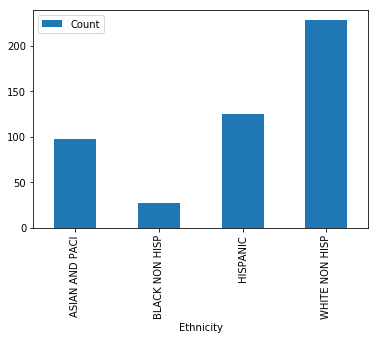

In [414]:
data_ema_2012_corr.plot.bar(x='Ethnicity',y='Count')

### Para mayor información sobre los atributos y métodos de la clase Dataframe en pandas ver:
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html